Assessment Task


Suggested possible analysis 

- What are the most important features for predicting X as a target variable?
- Which classification approach do you prefer for the prediction of X as a target variable, and why? o How to classify the loyal and churn customers using Support Vector Machines?
- Why is dimensionality reduction important in machine learning?

The pair would need to consider the following instructions (a - d) during the development of this pair project.
a) Logical justification based on the reasoning for the specific choice of machine learning approaches.
b) Multiple machine learning approaches (at least two) using hyperparameters and a comparison
between the chosen modelling approaches.
 c) Visualise your comparison of ML modelling outcomes. You may use a statistical approach to argue that one feature is more important than other features (for example, using PCA).
d) Cross-validation methods should be used to justify the authenticity of your ML results.
Your pair will present their findings and defend the results in the report (MS Doc or Open word format) by highlighting their individual contribution. Your report should capture the following aspects that are relevant
to 1.
2.
3.
4.
5.
your project investigations.
Motivation, a description of the problem domain, and an explanation of how the project's goals are justified using Prediction / Classification / Clustering Rules / Dimensionality Reduction etc..
(10 marks) Characterization of data, explanation and description of techniques used for the variation in the
accuracy across three training splits (10% / 20%/ 30%) using cross validation techniques.
(30 marks) Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a rationale for the chosen model and use visualisations to support your findings. Comments in Python code, conclusions of the project should be specified at the end of the report. Harvard Style must be
used for citations and references.
(20 marks) Each team member presents a PowerPoint presentation of their work (maximum 5 slides) to emphasize their distinctive contributions based on their involvement in the project's conceptual
understanding, code development, and deployment.
(20 marks individual) Each team member fully described their individual contributions to the project in a reflective journal, using at least 500 to 700 words as well as images, diagrams, figures, and visualizations to elaborate
his/ her work.
Submission Requirements
All assessment submissions must meet the minimum requirements listed below. Failure to do so may have implications for the marks awarded.
● The code and datasets should be provided and uploaded in zip format on Moodle.
● Clearly detail the number of words used in the report.
● Number of Words in the report (2000 words +/-10%) excluding diagrams, code, references and
titles. Number of words used to express individual contributions is part of the mentioned words.
● In the case of individual submission, students will submit a (1000 words +/-10%) report.
● Describe the contribution of each team member in the project clearly and use a bar chart or pie
chart to represent the effort and time spent during this project. Use version control like Github or any other tool to show the progress of both team members in CA1. You should have at least 5 commits on Github before submission.
● The rubric is provided for the detailed breakdown of marks at the end of this CA1.
● Use Harvard Referencing when citing third party material
● Be the student’s own work.
● Include the CCT assessment cover page.
● Be submitted by the deadline date specified or be subject to late submission penalties
(20 marks individual)
 
● Note: The names of pair members must be uploaded on the link provided on Moodle until 15th October 2023 (23:59).
● Must be clearly specified the number of words used after each section in the report.

In [55]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import ipywidgets

sns.set()

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

In [2]:
bike = pd.read_csv("Seoul_Bike.csv")

In [4]:
bike.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
bike.shape

(8760, 14)

In [5]:
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
bike.count()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(°C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(°C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

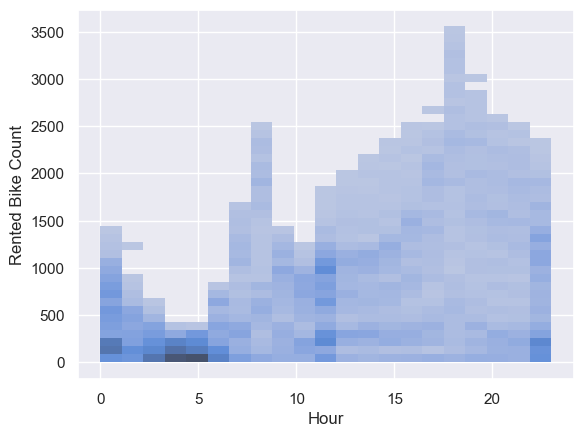

In [38]:
sns.histplot(data = bike, y = "Rented Bike Count", x = "Hour")

<Axes: xlabel='Holiday', ylabel='Count'>

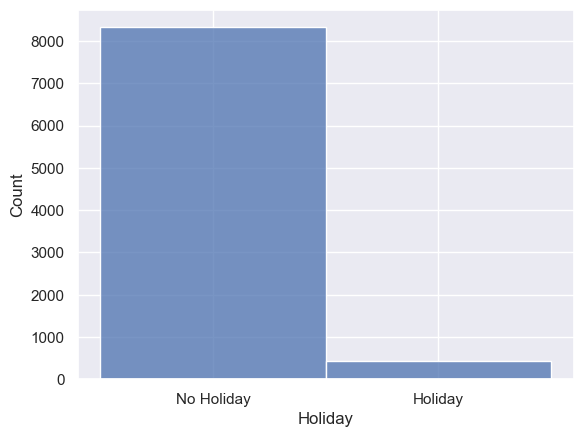

In [12]:
sns.histplot(data = bike, x = "Holiday")

<Axes: xlabel='Seasons', ylabel='Count'>

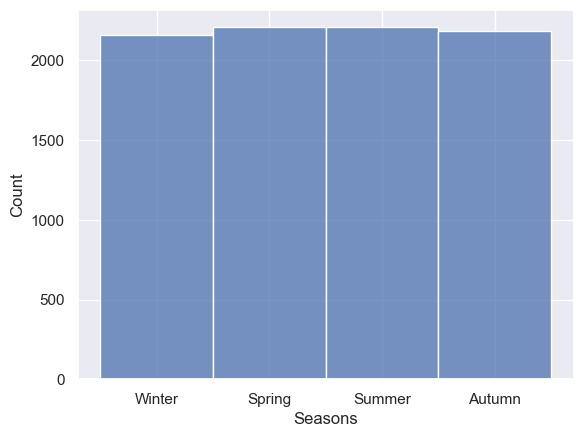

In [43]:
sns.histplot(data = bike, x = "Seasons")

ca1['Holiday'].replace('No Holiday', 0, inplace = True)
ca1['Holiday'].replace('Holiday', 1, inplace = True)

Talvez 

In [26]:
bike.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


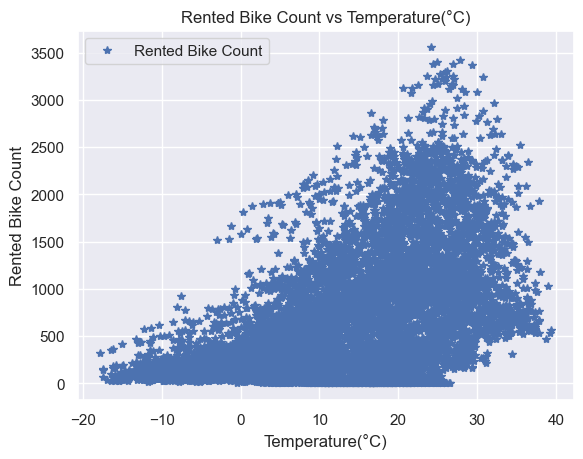

In [34]:
bike.plot(x = "Temperature(°C)", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Temperature(°C)")
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.show()

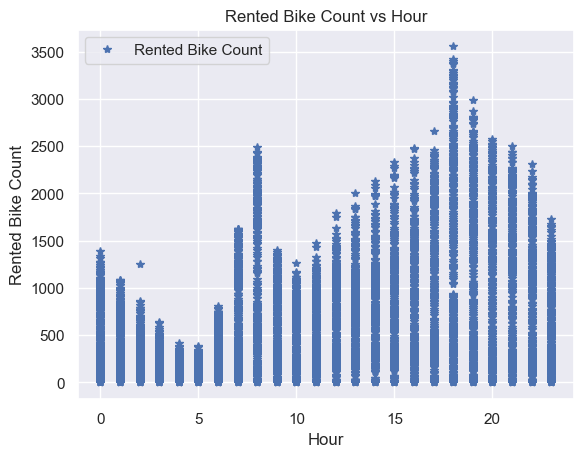

In [44]:
bike.plot(x = "Hour", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

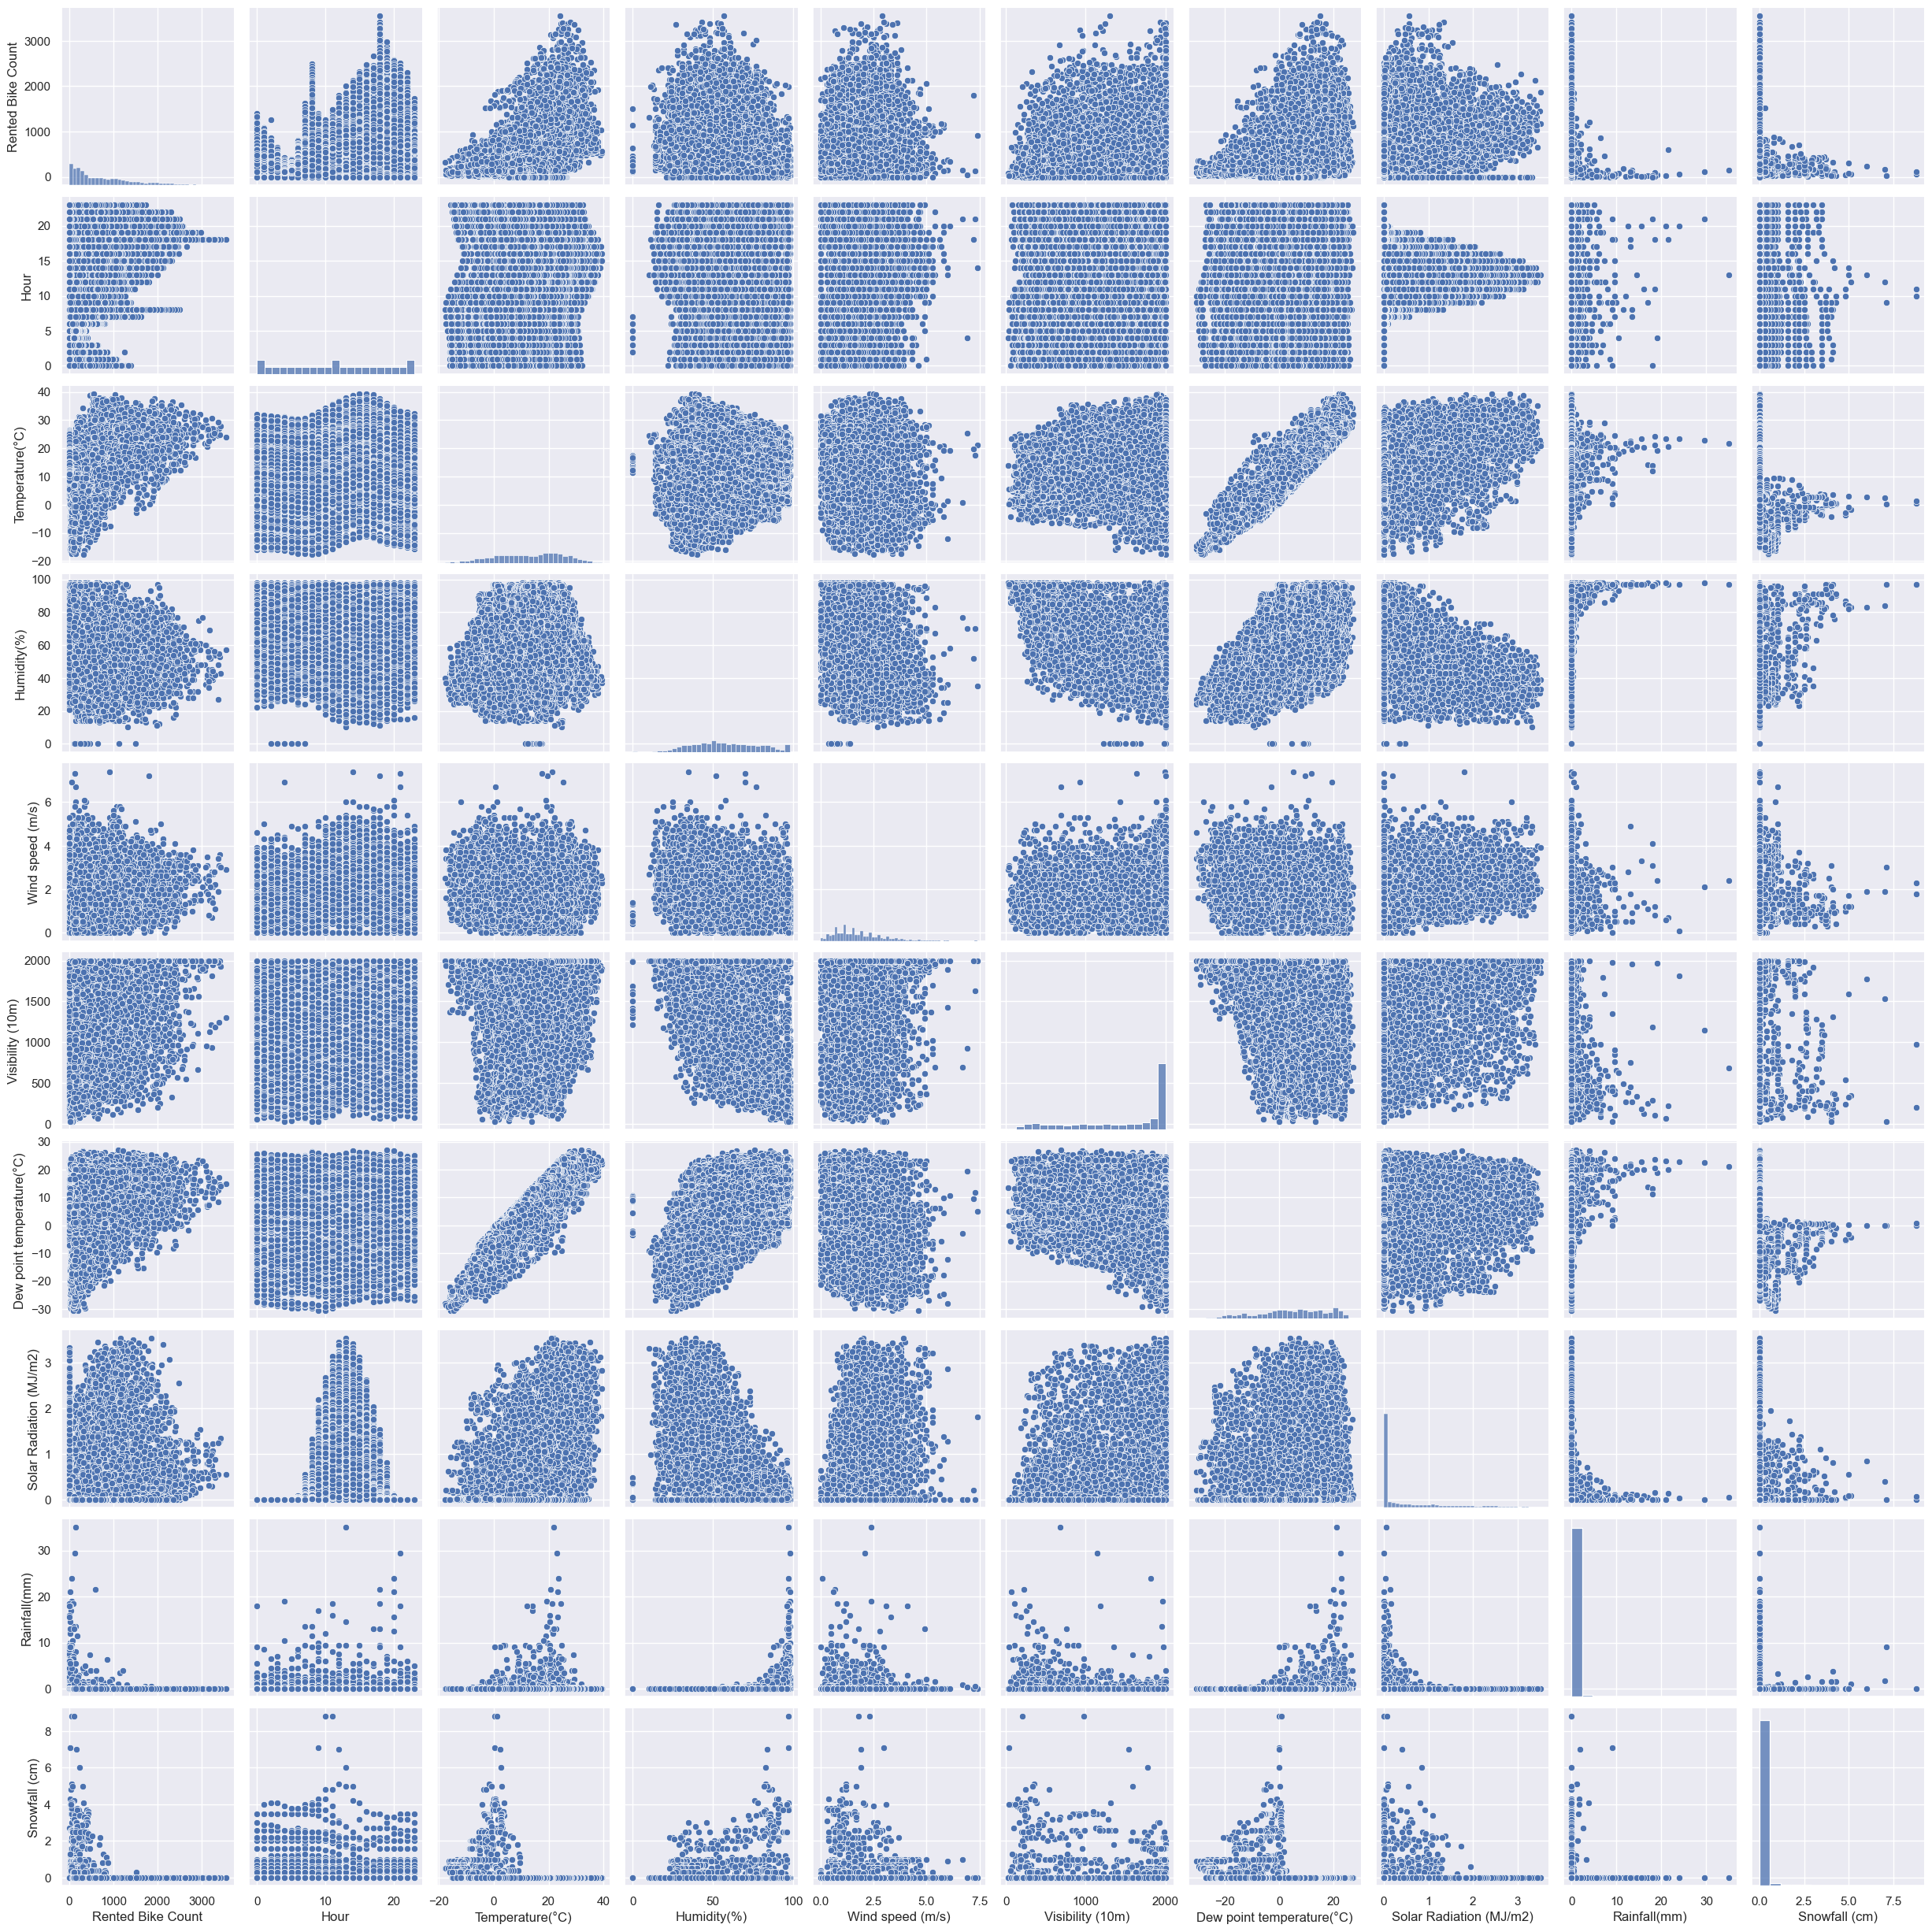

In [35]:
sns.pairplot(data = bike)

<Axes: >

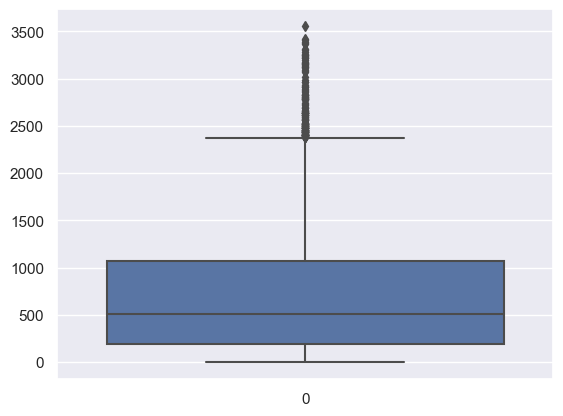

In [36]:
sns.boxplot(data = bike["Rented Bike Count"])

In [48]:
rbc = np.array(["Rented Bike Count"])

In [54]:
rbc

array(['Rented Bike Count'], dtype='<U17')

In [49]:
h = np.array(["Hour"])

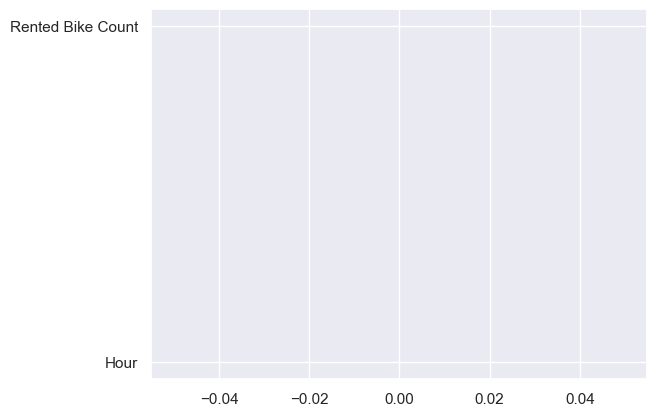

In [53]:
plt.plot(h)
plt.plot(rbc)
plt.show()

In [68]:
def plot_fct(w = 1):
    x = bike["Hour"]
    y = bike["Rented Bike Count"]
    plt.scatter(x, y)

In [70]:
ipywidgets.interact(plot_fct, w = (0, 1000, 0.5))

interactive(children=(FloatSlider(value=1.0, description='w', max=1000.0, step=0.5), Output()), _dom_classes=(…

<function __main__.plot_fct(w=1)>

In [73]:
ipywidgets.IntSlider(description = "Hour:")

IntSlider(value=0, description='Hour:')

In [84]:
def bandwidth_widget(bw = 1):
    sns.kdeplot(bike, lw = 3, fill = True, bw_adjust = 2)
    plt.xlim(-30, 300)
    plt.ylim(0, 0.03);

In [86]:
ipywidgets.interact(bandwidth_widget, bw = (0.1, 20));

interactive(children=(FloatSlider(value=1.0, description='bw', max=20.0, min=0.1), Output()), _dom_classes=('w…

In [17]:
bike_split = bike.drop(["Rented Bike Count"], axis = 1)

In [18]:
rbc = bike[["Rented Bike Count"]]

In [19]:
X = bike_split

y = rbc

In [21]:
X.head(3)

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [22]:
y.head(3)

,Rented Bike Count
0,254
1,204
2,173


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [40]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
    
    #def is a function

In [41]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

ValueError: could not convert string to float: '04/02/2018'